In [1]:
# Setting up by importing all the relevant libraries
import sys
import cv2
import json
import base64
from scipy import misc
import io

In [2]:
import os
import matplotlib.pyplot as plt

In [9]:
dir_name = r'C:\Users\ankuarora\Desktop\Client\2017_05_CogEx\2017_07_R2Implementation\Sprint 5\USIproblemstatement'
img_form = os.path.join(dir_name, 'output.png')
config_file_in = os.path.join(dir_name, 'outputjson')

In [9]:
##   """
##   
##   Purpose: To identify and extract the reference markers for each element of the unknown form based on the 
##               co-ordinate based configuration file
##   Input(s): 1. Unknown form as a .png file
##             2. Coordinate based configuration file (.json), created either manually or using the XPMS UI
##   Outputs(s): A re-defined configuration file (.json) replacing the coordinates for each element with a  
##               reference marker, encoded as a string (using base64 encoding)
##   Created by: Ankur Arora, Deloitte USI
##   Created on: July, 31, 2017
##   Modified by: 
##   Modified on:
##   
##   """

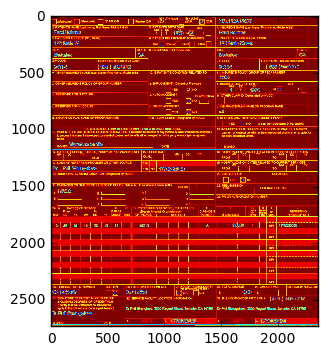

(<matplotlib.image.AxesImage at 0x1dced9354a8>, None)

In [6]:
# Loading the form template in the form of an array
form = cv2.imread(img_form)
form_gray = cv2.cvtColor(form,cv2.COLOR_BGR2GRAY)
form_gray = cv2.GaussianBlur(form_gray,(5,5),0)
plt.imshow(form_gray), plt.show()

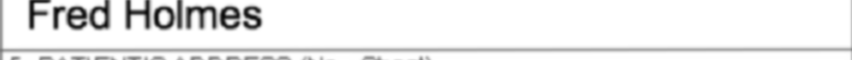

In [23]:
misc.toimage(form_gray[137:197,0:852])

In [11]:
# Loading the coordinate based json configuration file as a python dictionary
with open(config_file_in) as config:
    dict_config = json.load(config)
        
print (dict_config)

{'fields': ['Insured_ID', 'Patient_name', 'Patient_zipcode', 'Insured_name', 'Patient_city', 'Patient_state', 'Insured_city', 'Insured_state', 'Insured_zipcode', 'Insured_plan_name', '1_Nature_of_illness', '1_rendering_provider_id', 'Federal_tax_id', 'Patient_account_no', 'Service_facility_location_a', 'Billing_provider_a'], 'coordinates': {'Service_facility_location': {'coordinates': [[649, 2504], [1456, 2666]], 'padding': [[0, 0]], 'type': 0}, 'Amount_paid': {'coordinates': [[1790, 2398], [2073, 2468]], 'padding': [[0, 0]], 'type': 0}, 'Billing_provider': {'coordinates': [[1456, 2503], [2355, 2663]], 'padding': [[0, 0]], 'type': 0}, 'Insured_ID': {'coordinates': [[1450, 35], [2350, 98]], 'padding': [[0, 0]], 'type': 0}, 'Insured_zipcode': {'coordinates': [[1450, 427], [1833, 499]], 'padding': [[0, 0]], 'type': 0}, 'Other_9_c_reserved': {'coordinates': [[0, 829], [853, 895]], 'padding': [[0, 0]], 'type': 0}, '2_Nature_of_illness': {'coordinates': [[444, 1525], [655, 1578]], 'padding':

In [20]:
type(dict_config['coordinates'])

dict

In [25]:
key = 'Total_charge'
print (dict_config[key]["coordinates"])

{'x1': 1550, 'x2': 2450, 'y1': 630, 'y2': 700}


In [21]:
x1 = x2 = y1 = y2 = 0.0 # Resetting the cooordinates
# Defining the X coordinates (x1, x2) of the reference marker
x1 = dict_config[key]["coordinates"]["x1"]
x2 = dict_config[key]["coordinates"]["x2"]
# Defining the Y coordinates (y1, y2) of the reference marker
if dict_config[key]["type"] == "txt":
    # Slice the region right above the text element
    y1 = dict_config[key]["coordinates"]["y1"] - (dict_config[key]["coordinates"]["y2"] - dict_config[key]["coordinates"]["y1"])
    y2 = dict_config[key]["coordinates"]["y1"]
if dict_config[key]["type"] == 'omr':
    # Slice the OMR region itself
    y1 = dict_config[key]["coordinates"]["y1"]
    y2 = dict_config[key]["coordinates"]["y2"]
    # Slice the region above the table as the start reference marker
if dict_config[key]["type"] == 'tbl':
    y1 = dict_config[key]["coordinates"]["y1"] - (100)
    y2 = dict_config[key]["coordinates"]["y1"]

1550 2450 560 630


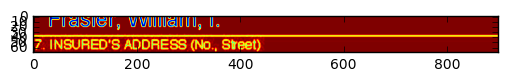

(<matplotlib.image.AxesImage at 0x28414ef9668>, None)

In [26]:
print (x1, x2, y1, y2)
plt.imshow(form_gray[y1:y2, x1:x2]), plt.show()

In [147]:
# Encode the marker into a base64 string 
ref_marker = misc.toimage(form_gray[y1:y2,x1:x2])
in_mem_file = io.BytesIO()
ref_marker.save(in_mem_file, format = "PNG")
in_mem_file.seek(0)
img_bytes = in_mem_file.read()
ref_marker_encoded = base64.encodebytes(img_bytes).decode('utf-8')

In [149]:
ref_marker_encoded.encode('utf-8')

b'iVBORw0KGgoAAAANSUhEUgAAA4QAAABGCAAAAACx7QXFAAArBUlEQVR4nO29a5Mjx5EteI575AuP\nKgBVXd0URalFju4MNZJpTKsx209rtrafru3vXZu/sHtNM3e1ejTnjkhRI7Ef9QJQAApAZob7fohE\nVXV39agl8kpsDo4Z2Z2RmRGO6PBwD38lHf8RFv/yf/0LfvJ//mT46o31Zz/74vg761//Zh6r9//h\nH78rp09+8duzDejRq4cf/fjvjwPQnv/q55++WFPpKB9870cfn+TE+rOffYqPfvphBa9vXrq9/VrX\nj8v7CFv+v//0s/jj//rTQ95efP/f/unn+tP/+g8DAD7/2T/9XH/6vw8/SYPd/pCbv91LyB3q15/9\n7FN8+zv1b//9fFF79fDDjx+cffK7i+t455k/ddr22OM1+JsX0n+MOPv0Xw+ftrP+4fV8uohx/uT/\n/vVV9XCo8erscjbFaNCnb774+T+fY3A01Li4+Ox8hew4IM4+/TnwNxGI05uXFhefnS/jD09yvtb1\n/ePrcDKYLy6XgwB4u9lELcuiLDVuNq0TiMvLBQaTarEb7N6f8Doht9Qjzj79efv8aVzw0fHV2eXs\n/Pzo8g/x4CHuPLPHHl8eb8GE3m5Wdy6pmRLebmaz2cEH359cfh7fP2y/+MWvzg7+9ocnWXP65MnZ\n6afffVSGOP/80/Pw7Q+/N8ma0yefXP6Po/dHIXW3aR2++eIXv74Y/d3HJ1lz+uSTi19Cs+PEU3e6\nHt1PYXb0wdH84vcXR+GG4YbFHcZsLn5/gaMPJk+7wd70u3aEvE49vN2s1nFx+O2PHuD0yZOz56te\nLD/6uxPceWaPPb483mIdxdmnuKMShtHDxBhxjYcf/2R89f7m24Pl559dyLd+/L8ca5weopk9//xv\nJqE5//x5fP8nP/72QON0FP4tf1lyxPnnn037f/e//mCscTrSX80+GT06TPTc6f

In [137]:
# ref_marker_encoded

In [122]:
type(ref_marker_encoded)

bytes

In [143]:
ref2_d = re

In [ ]:
ref2_d = base64.decode

In [150]:
ref2_d = base64.decodebytes(ref_marker_encoded.encode('utf-8'))

In [151]:
# ref2_d = ref_marker_encoded.decode('base64')
with open('temp_image.png', 'wb') as f:
    f.write(ref2_d)
    f.close()
img_ref2 = cv2.imread('temp_image.png',0)

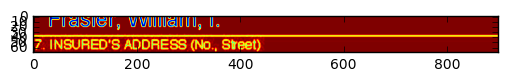

(<matplotlib.image.AxesImage at 0x284150e1470>, None)

In [152]:
plt.imshow(img_ref2), plt.show()

In [93]:
print (ref_marker_encoded)

iVBORw0KGgoAAAANSUhEUgAAA4QAAABGCAAAAACx7QXFAAArBUlEQVR4nO29a5Mjx5EteI575AuP
KgBVXd0URalFju4MNZJpTKsx209rtrafru3vXZu/sHtNM3e1ejTnjkhRI7Ef9QJQAApAZob7fohE
VXV39agl8kpsDo4Z2Z2RmRGO6PBwD38lHf8RFv/yf/0LfvJ//mT46o31Zz/74vg761//Zh6r9//h
H78rp09+8duzDejRq4cf/fjvjwPQnv/q55++WFPpKB9870cfn+TE+rOffYqPfvphBa9vXrq9/VrX
j8v7CFv+v//0s/jj//rTQ95efP/f/unn+tP/+g8DAD7/2T/9XH/6vw8/SYPd/pCbv91LyB3q15/9
7FN8+zv1b//9fFF79fDDjx+cffK7i+t455k/ddr22OM1+JsX0n+MOPv0Xw+ftrP+4fV8uohx/uT/
/vVV9XCo8erscjbFaNCnb774+T+fY3A01Li4+Ox8hew4IM4+/TnwNxGI05uXFhefnS/jD09yvtb1
/ePrcDKYLy6XgwB4u9lELcuiLDVuNq0TiMvLBQaTarEb7N6f8Doht9Qjzj79efv8aVzw0fHV2eXs
/Pzo8g/x4CHuPLPHHl8eb8GE3m5Wdy6pmRLebmaz2cEH359cfh7fP2y/+MWvzg7+9ocnWXP65MnZ
6afffVSGOP/80/Pw7Q+/N8ma0yefXP6Po/dHIXW3aR2++eIXv74Y/d3HJ1lz+uSTi19Cs+PEU3e6
Ht1PYXb0wdH84vcXR+GG4YbFHcZsLn5/gaMPJk+7wd70u3aEvE49vN2s1nFx+O2PHuD0yZOz56te
LD/6uxPceWaPPb483mIdxdmnuKMShtHDxBhxjYcf/2R89f7m24Pl559dyLd+/L8ca5weopk9//xv
JqE5//x5fP8nP/72QON0FP4tf1lyxPnnn037f/e//mCscTrSX80+GT06TPTc6fpQ7yVKB5MhlpeL

In [123]:
# Define the Y coordinates (y1, y2) for the end of the table element(s)  
if dict_config[key]["type"] == 'tbl':
    # Slice the region right after the end of the table
    y1_ = dict_config[key]["coordinates"]["y2"]
    y2_ = dict_config[key]["coordinates"]["y2"] + (100)
    # Encode the marker into a base64 string
    ref_marker = misc.toimage(form_gray[y1_:y2_,x1:x2])
    in_mem_file = io.BytesIO()
    ref_marker.save(in_mem_file, format = "PNG")
    in_mem_file.seek(0)
    img_bytes = in_mem_file.read()
    ref_marker_encoded_ = base64.encodestring(img_bytes).decode('ascii')
else:
    # For non-table elements, no end marker is required
    ref_marker_encoded_ = ""

In [125]:
print(ref_marker_encoded)

b'iVBORw0KGgoAAAANSUhEUgAAA4QAAABGCAAAAACx7QXFAAArBUlEQVR4nO29a5Mjx5EteI575AuP\nKgBVXd0URalFju4MNZJpTKsx209rtrafru3vXZu/sHtNM3e1ejTnjkhRI7Ef9QJQAApAZob7fohE\nVXV39agl8kpsDo4Z2Z2RmRGO6PBwD38lHf8RFv/yf/0LfvJ//mT46o31Zz/74vg761//Zh6r9//h\nH78rp09+8duzDejRq4cf/fjvjwPQnv/q55++WFPpKB9870cfn+TE+rOffYqPfvphBa9vXrq9/VrX\nj8v7CFv+v//0s/jj//rTQ95efP/f/unn+tP/+g8DAD7/2T/9XH/6vw8/SYPd/pCbv91LyB3q15/9\n7FN8+zv1b//9fFF79fDDjx+cffK7i+t455k/ddr22OM1+JsX0n+MOPv0Xw+ftrP+4fV8uohx/uT/\n/vVV9XCo8erscjbFaNCnb774+T+fY3A01Li4+Ox8hew4IM4+/TnwNxGI05uXFhefnS/jD09yvtb1\n/ePrcDKYLy6XgwB4u9lELcuiLDVuNq0TiMvLBQaTarEb7N6f8Doht9Qjzj79efv8aVzw0fHV2eXs\n/Pzo8g/x4CHuPLPHHl8eb8GE3m5Wdy6pmRLebmaz2cEH359cfh7fP2y/+MWvzg7+9ocnWXP65MnZ\n6afffVSGOP/80/Pw7Q+/N8ma0yefXP6Po/dHIXW3aR2++eIXv74Y/d3HJ1lz+uSTi19Cs+PEU3e6\nHt1PYXb0wdH84vcXR+GG4YbFHcZsLn5/gaMPJk+7wd70u3aEvE49vN2s1nFx+O2PHuD0yZOz56te\nLD/6uxPceWaPPb483mIdxdmnuKMShtHDxBhxjYcf/2R89f7m24Pl559dyLd+/L8ca5weopk9//xv\nJqE5//x5fP8nP/72QON0FP4tf1lyxPnnn037f/e//mCscTrSX80+GT06TPTc6f

In [138]:
# Update the dictionary to add the reference markers and remove the coordinates 
dict_config[key]["ref1"] = ref_marker_encoded
dict_config[key]["ref2"] = ref_marker_encoded_
# del dict_config[key]["coordinates"]

In [139]:
print(dict_config)

{'Patient_Relationship_to_Insured': {'coordinates': {'x1': 950, 'x2': 1540, 'y1': 600, 'y2': 700}, 'type': 'omr'}, 'Insured_Address': {'ref1': 'iVBORw0KGgoAAAANSUhEUgAAA4QAAABGCAAAAACx7QXFAAArBUlEQVR4nO29a5Mjx5EteI575AuP\nKgBVXd0URalFju4MNZJpTKsx209rtrafru3vXZu/sHtNM3e1ejTnjkhRI7Ef9QJQAApAZob7fohE\nVXV39agl8kpsDo4Z2Z2RmRGO6PBwD38lHf8RFv/yf/0LfvJ//mT46o31Zz/74vg761//Zh6r9//h\nH78rp09+8duzDejRq4cf/fjvjwPQnv/q55++WFPpKB9870cfn+TE+rOffYqPfvphBa9vXrq9/VrX\nj8v7CFv+v//0s/jj//rTQ95efP/f/unn+tP/+g8DAD7/2T/9XH/6vw8/SYPd/pCbv91LyB3q15/9\n7FN8+zv1b//9fFF79fDDjx+cffK7i+t455k/ddr22OM1+JsX0n+MOPv0Xw+ftrP+4fV8uohx/uT/\n/vVV9XCo8erscjbFaNCnb774+T+fY3A01Li4+Ox8hew4IM4+/TnwNxGI05uXFhefnS/jD09yvtb1\n/ePrcDKYLy6XgwB4u9lELcuiLDVuNq0TiMvLBQaTarEb7N6f8Doht9Qjzj79efv8aVzw0fHV2eXs\n/Pzo8g/x4CHuPLPHHl8eb8GE3m5Wdy6pmRLebmaz2cEH359cfh7fP2y/+MWvzg7+9ocnWXP65MnZ\n6afffVSGOP/80/Pw7Q+/N8ma0yefXP6Po/dHIXW3aR2++eIXv74Y/d3HJ1lz+uSTi19Cs+PEU3e6\nHt1PYXb0wdH84vcXR+GG4YbFHcZsLn5/gaMPJk+7wd70u3aEvE49vN2s1nFx+O2PHuD0yZOz56te

In [64]:
config_file_out = config_file_in.replace(".json","") + "_ref.json"
print(config_file_out)

C:\Users\ankuarora\Desktop\Client\2017_05_CogEx\2017_07_R2Implementation\Sprint 5\1usrstory_reference_identify\CMS1500_config_WF_ref.json


In [88]:
type(dict_config)

dict

In [140]:
# Export the updated dictionary as a new (json) configuration file
with open(config_file_out, 'w') as fp:
    json.dumps(dict_config, fp, indent=4)

In [ ]:
# Define the main function for standalone script call
if __name__ == '__main__':
    reference_config(sys.argv[1], sys.argv[2], sys.argv[3])